In [1]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
from platform import python_version
print("Python version is", python_version())

Python version is 3.11.4


In [2]:
#import CSV file
df = pd.read_csv("C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/medical_clean.csv")

In [3]:
print("The dataset has",df.shape[0],"observations and",df.shape[1],"variables.")

The dataset has 10000 observations and 50 variables.


In [4]:
df1 = df.select_dtypes(exclude = 'object')
df1.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
df1.shape

(10000, 23)

In [6]:
print("The dataset1 has",df1.shape[0],"observations and",df1.shape[1],"variables.")

The dataset1 has 10000 observations and 23 variables.


In [7]:
#drop all discrete variables
cont_df = df1.drop(['CaseOrder', 'Zip', 'Children', 'Doc_visits', 'Full_meals_eaten', 'Population', 
                    'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [8]:
print("The cont_df has",cont_df.shape[0],"observations and",cont_df.shape[1],"variables.")

The cont_df has 10000 observations and 9 variables.


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_df = scaler.fit_transform(cont_df)

In [10]:
scaled_df = pd.DataFrame(norm_df, columns = cont_df.columns)
scaled_df.to_csv("C:/Users/e0145653/Documents/WGU/D212 - Data Mining II/medical_scaled_df2.csv")

In [11]:
scaled_df.head()

,Lat,Lng,Age,Income,VitD_levels,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.814668,0.297134,-0.024795,1.615914,0.583603,-0.634713,-0.907310,-0.727185,0.765005
1,-1.463305,0.395522,-0.121706,0.221443,0.483901,0.956445,-0.734595,-0.513228,0.715114
2,0.886966,-0.354788,-0.024795,-0.915870,0.046227,-0.634713,-1.128292,-1.319983,0.698635
3,0.952530,-0.149403,1.186592,-0.026263,-0.687811,-0.634713,-1.244503,-1.460517,0.009004
4,-0.213252,0.943984,-1.526914,-1.377325,-0.260366,2.547602,-1.261991,-1.467285,-1.408991


In [12]:
from sklearn.decomposition import PCA

pca = PCA()

PC = pca.fit_transform(scaled_df)

In [13]:
loading_matrix = pd.DataFrame(pca.components_, columns = cont_df.columns,
                             index = ('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'))

loading_matrix

,Lat,Lng,Age,Income,VitD_levels,vitD_supp,Initial_days,TotalCharge,Additional_charges
PC1,-0.013036,-0.010564,0.086489,-0.020477,-0.001802,0.024998,0.700734,0.701888,0.086698
PC2,-0.008154,0.010901,0.701335,-0.018613,0.018984,0.015710,-0.092397,-0.081837,0.701253
PC3,0.707413,-0.698597,0.002232,-0.087390,0.058851,0.016388,-0.000589,-0.001565,0.012313
PC4,0.010036,-0.114161,0.010987,0.624898,-0.662226,0.396782,-0.000278,-0.002215,0.016232
PC5,0.021901,0.106499,-0.018152,-0.532485,-0.018938,0.838320,-0.019980,-0.018719,-0.020466
PC6,-0.091532,-0.088715,-0.006849,0.538584,0.744944,0.372345,0.001000,0.002000,-0.006683
PC7,-0.700253,-0.692417,-0.003088,-0.165768,-0.048205,-0.000856,-0.014646,-0.013250,-0.000842
PC8,0.003857,-0.006681,0.706714,0.002307,-0.001929,0.000288,0.031674,-0.031472,-0.706040
PC9,0.001484,-0.000359,0.026316,0.001313,-0.001557,-0.000580,-0.706270,0.706490,-0.036816


In [15]:
exp_var = pca.explained_variance_ratio_

print(f"The variance of the first   principal component (PC1) is: {exp_var[0] * 100:.2f}%")
print(f"The variance of the second  principal component (PC2) is: {exp_var[1] * 100:.2f}%")
print(f"The variance of the third   principal component (PC3) is: {exp_var[2] * 100:.2f}%")
print(f"The variance of the fourth  principal component (PC4) is: {exp_var[3] * 100:.2f}%")
print(f"The variance of the fifth   principal component (PC5) is: {exp_var[4] * 100:.2f}%")
print(f"The variance of the sixth   principal component (PC6) is: {exp_var[5] * 100:.2f}%")
print(f"The variance of the seventh principal component (PC7) is: {exp_var[6] * 100:.2f}%")
print(f"The variance of the eighth  principal component (PC8) is: {exp_var[7] * 100:.2f}%")
print(f"The variance of the ninth   principal component (PC9) is: {exp_var[8] * 100:.2f}%")

The variance of the first   principal component (PC1) is: 22.15%
The variance of the second  principal component (PC2) is: 19.04%
The variance of the third   principal component (PC3) is: 12.37%
The variance of the fourth  principal component (PC4) is: 11.28%
The variance of the fifth   principal component (PC5) is: 11.09%
The variance of the sixth   principal component (PC6) is: 10.97%
The variance of the seventh principal component (PC7) is: 9.82%
The variance of the eighth  principal component (PC8) is: 3.15%
The variance of the ninth   principal component (PC9) is: 0.13%


In [16]:
pcomp = np.arange(pca.n_components_) +1

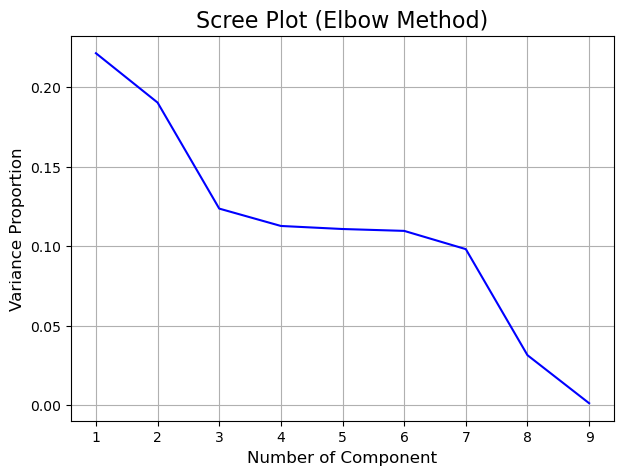

In [17]:
plt.figure(figsize=(7,5))
plt.plot(pcomp, exp_var, "b-")
plt.title('Scree Plot (Elbow Method)', fontsize=16)
plt.xlabel('Number of Component', fontsize=12)
plt.ylabel('Variance Proportion', fontsize=12)
plt.grid()
plt.show()

In [18]:
print(dict(zip(['PC1', 'PC2', 'PC3'], pcomp)))

{'PC1': 1, 'PC2': 2, 'PC3': 3}


In [19]:
#identify each variance/eigenvalue of the pc defined by the elbow method

print("Variance of the first three principal components:")
print(pca.explained_variance_[:3])

print("Variance Ratios of the first three principal components:")
print(pca.explained_variance_ratio_[:3])

Variance of the first three principal components:
[1.99326663 1.71385821 1.11357426]
Variance Ratios of the first three principal components:
[0.22145192 0.19040965 0.1237181 ]


In [20]:
#identify the total variance/eigenvalue captured by all pc's 

total_var = np.sum(pcomp[:3])/np.sum(pcomp)

print(f"Total Variance of the first three components is: {total_var * 100:.2f}%")

total_var_ratio = np.sum(pca.explained_variance_ratio_[:3])

print(f"Total Variance Ratio of the first three components is: {total_var_ratio * 100:.2f}%")

Total Variance of the first three components is: 13.33%
Total Variance Ratio of the first three components is: 53.56%


In [21]:
print("Explained variance by component: \n", exp_var)
total_var = sum(pca.explained_variance_ratio_)
print(f"Total variance captured by the principal components: {total_var * 100:.2f}%")

Explained variance by component: 
 [0.22145192 0.19040965 0.1237181  0.11279856 0.11088038 0.10970191
 0.09822288 0.03151473 0.00130187]
Total variance captured by the principal components: 100.00%


In [22]:
eigenvalues = pca.explained_variance_

eigenvalues

array([1.99326663, 1.71385821, 1.11357426, 1.01528855, 0.99802324,
       0.98741591, 0.88409434, 0.28366091, 0.01171804])

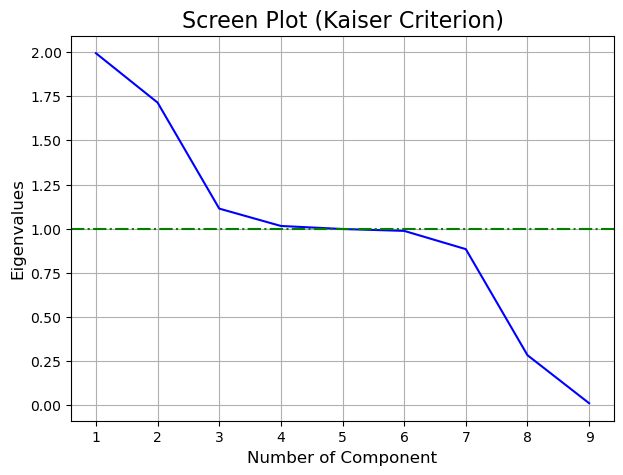

In [24]:
#Kaiser Criterion

plt.figure(figsize=(7,5))
plt.plot(pcomp, var, 'b')
plt.title('Screen Plot (Kaiser Criterion)', fontsize=16)
plt.xlabel('Number of Component', fontsize=12)
plt.ylabel('Eigenvalues', fontsize=12)
plt.axhline(y=1, color='g', linestyle='dashdot')
plt.grid()
plt.show()

In [30]:
print(dict(zip(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], pcomp)))

{'PC1': 1, 'PC2': 2, 'PC3': 3, 'PC4': 4, 'PC5': 5, 'PC6': 6}


In [31]:
#identify each variance/eigenvalue of the pc defined by the kaiser method

print("Variance of the first five principal components:")
print(pca.explained_variance_[:6])

Variance of the first five principal components:
[1.99326663 1.71385821 1.11357426 1.01528855 0.99802324 0.98741591]


In [35]:
eigenvalues = pca.explained_variance_

n_components = np.sum(eigenvalues >= 1)
n2_components = np.sum(eigenvalues >= 0.98)

print("With eigenvalues greater than 1, the total number of components to retain is", n_components , ".")
print("Lowering the eigenvalue limit slightly to 0.98, the total number of components to retain increases to", n2_components, ".")

With eigenvalues greater than 1, the total number of components to retain is 4 .
Lowering the eigenvalue limit slightly to 0.98, the total number of components to retain increases to 6 .


In [36]:
variance = pca.explained_variance_ratio_

print(f"The variance of PC1 is: {variance[0] * 100:.3f}%")
print(f"The variance of PC2 is: {variance[1] * 100:.3f}%")
print(f"The variance of PC3 is: {variance[2] * 100:.3f}%")
print(f"The variance of PC4 is: {variance[3] * 100:.3f}%")
print(f"The variance of PC5 is: {variance[4] * 100:.3f}%")
print(f"The variance of PC6 is: {variance[5] * 100:.3f}%")

The variance of PC1 is: 22.145%
The variance of PC2 is: 19.041%
The variance of PC3 is: 12.372%
The variance of PC4 is: 11.280%
The variance of PC5 is: 11.088%
The variance of PC6 is: 10.970%


In [40]:
total_variance_captured = np.sum(pca.explained_variance_ratio_[:6])

print(f"The total variance captured in all six principal components is: {total_variance_captured * 100:.2f}%")

The total variance captured in all six principal components is: 86.90%
